In [10]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image, ImageOps

In [11]:
base_path = '/Users/jackgengqc/Desktop/UNC 23F/COMP 562/caltech-101_top12'
categories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
print(categories)


['hawksbill', 'chandelier', 'airplanes', 'grand_piano', 'ketch', 'bonsai', 'Leopards', 'car_side', 'watch', 'brain', 'Motorbikes', 'Faces_easy']


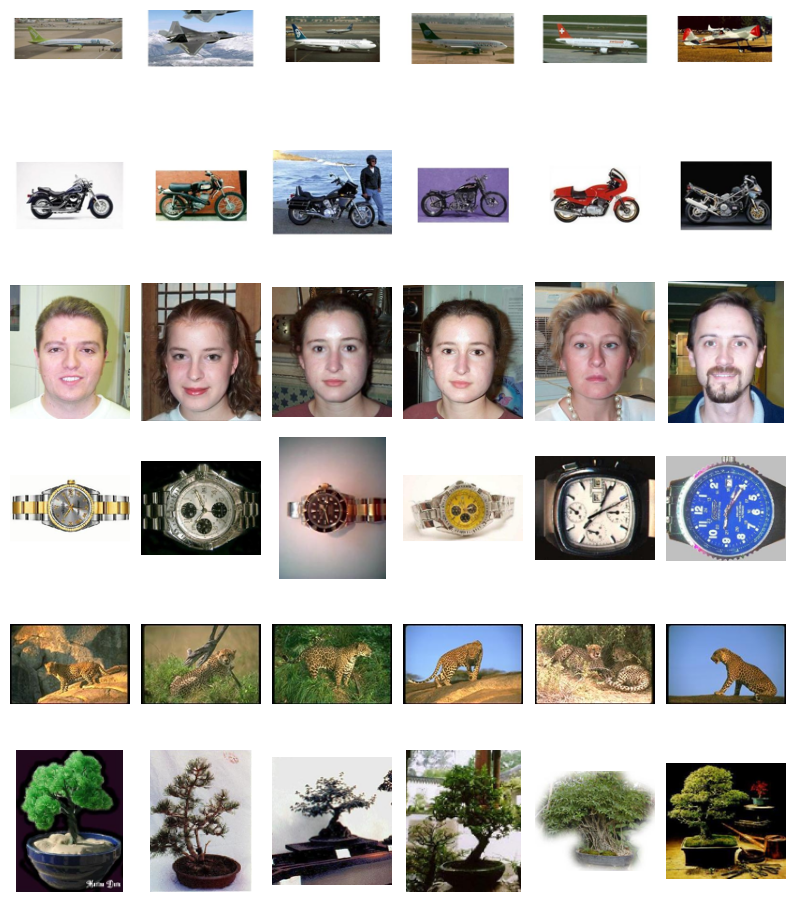

In [23]:
# List the top 6 categories (you should manually specify these based on your dataset)
top_categories = ['airplanes', 'Motorbikes', 'Faces_easy','watch', 'Leopards', 'bonsai']

# Number of images per category to display
num_images_per_category = 6

# Desired size of the square image
desired_size = 128

# Create a figure with subplots
fig, axes = plt.subplots(len(top_categories), num_images_per_category, figsize=(10, 12))

# Function to resize and pad images
def process_image(image_path):
    image = Image.open(image_path)
    # Resize image to maintain aspect ratio
    image.thumbnail((desired_size, desired_size))
    # Pad to make the image square and set background to white
    delta_w = desired_size - image.size[0]
    delta_h = desired_size - image.size[1]
    padding = (delta_w // 40, delta_h // 40, delta_w // 40, delta_h // 40)
    return ImageOps.expand(image, padding, fill='white')

# Iterate over each category and each subplot
for row, category in enumerate(top_categories):
    category_path = os.path.join(base_path, category)
    images = [img for img in os.listdir(category_path) if img.endswith('.jpg')]
    selected_images = random.sample(images, num_images_per_category)
    
    for col, img_name in enumerate(selected_images):
        img_path = os.path.join(category_path, img_name)
        image = process_image(img_path)
        
        ax = axes[row, col]
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        if col == 0:
            ax.set_ylabel(category, size='large', rotation=0, labelpad=1)

# Remove spaces between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show and save the figure
plt.show()
# Uncomment the next line to save the figure
# fig.savefig('dataset_thumbnails.pdf', bbox_inches='tight')


/var/folders/4n/tywqqk8s2n9fkqrkhyh83gq40000gn/T/ipykernel_57057/3071492083.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)


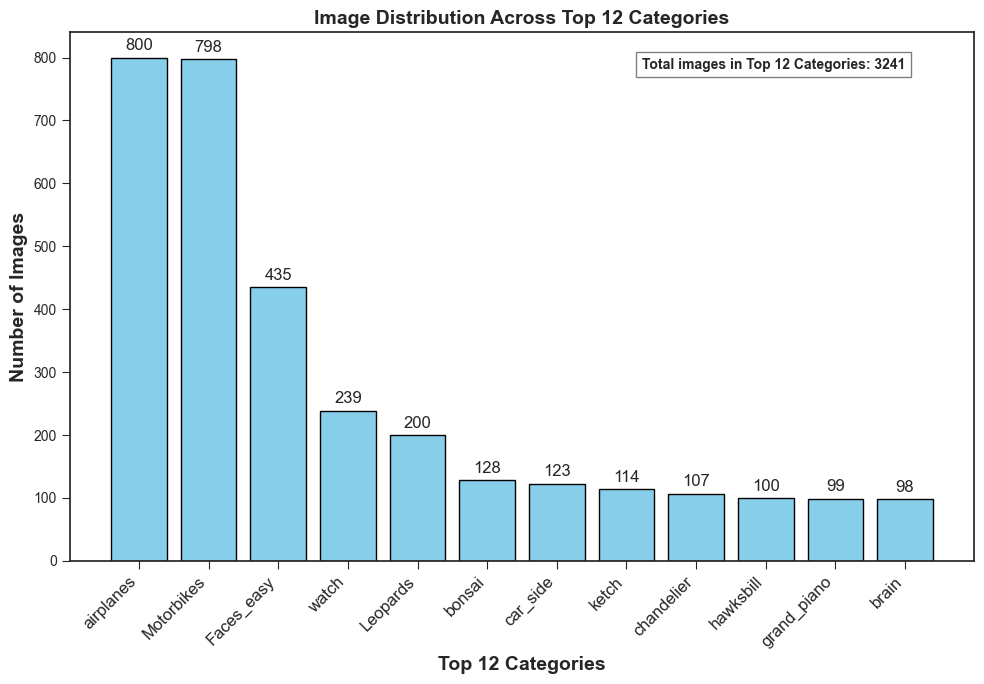

In [37]:
import matplotlib.pyplot as plt

# Define the data for categories and counts
categories = [
    ('airplanes', 800), ('Motorbikes', 798), ('Faces_easy', 435),
    ('watch', 239), ('Leopards', 200), ('bonsai', 128), 
    ('car_side', 123), ('ketch', 114), ('chandelier', 107), 
    ('hawksbill', 100), ('grand_piano', 99), ('brain', 98)
]
labels, counts = zip(*categories)

# Define the style for the plot
plt.style.use('seaborn-ticks')
plt.rc('font', size=12) # controls default text sizes
plt.rc('axes', titlesize=14) # fontsize of the axes title
plt.rc('axes', labelsize=12) # fontsize of the x and y labels
plt.rc('xtick', labelsize=10) # fontsize of the tick labels
plt.rc('ytick', labelsize=10) # fontsize of the tick labels
plt.rc('legend', fontsize=10) # legend fontsize
plt.rc('figure', titlesize=16) # fontsize of the figure title

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(labels, counts, color='skyblue', edgecolor='black')

# Set labels and title
ax.set_ylabel('Number of Images', fontsize=14, weight='bold')
ax.set_xlabel('Top 12 Categories', fontsize=14, weight='bold')
ax.set_title('Image Distribution Across Top 12 Categories', fontsize=14, weight='bold')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)

# Remove the grid and set a light facecolor for the plot
ax.grid(False)
fig.set_facecolor('white')

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
total_top_12 = sum(counts)
plt.text(len(labels) - 1, max(counts), f'Total images in Top 12 Categories: {total_top_12}', 
         fontsize=10, weight='bold', ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

# Save the figure to a file
plt.tight_layout()
plt.savefig('image_category_distribution.png', bbox_inches='tight', format='png', dpi=300)

# Display the plot
plt.show()
